<a href="https://colab.research.google.com/github/jclee0109/deep_learning_self_study/blob/main/2_1_%ED%9B%88%EB%A0%A8_%EC%84%B8%ED%8A%B8%EC%99%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [4]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [6]:
kn.score(fish_data, fish_target)

1.0

In [15]:
# 훈련세트와 테스트 세트로 나누기!
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)

In [16]:
kn.score(test_input, test_target)

0.0

In [19]:
# 샘플링 편향 발생!! -> 랜덤으로 셔플 후 인덱싱!
# 이것을 위해 numpy array 필요!

import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(21)

index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

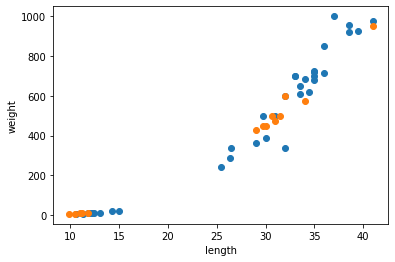

In [20]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [21]:
kn = kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))
print(kn.predict(test_input))
print(test_target)

1.0
[1 1 0 1 0 0 0 1 1 1 0 1 1 1]
[1 1 0 1 0 0 0 1 1 1 0 1 1 1]
